In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
data = pd.read_excel('/content/drive/MyDrive/CAPSTONE/CAPSTONE_PROJECT/0_dataset/2_CLEANED DATASET/FULLY_CLEANED DATASET.xlsx')

In [4]:
df = data.copy()

## **Final Encoding Plan Based on Unique Category Counts**

| Column | Unique Count | Feature Type | Recommended Encoding |
|--------|--------------|--------------|----------------------|
| Unnamed: 0 | 205539 | ID | DROP |
| Report Number | 115863 | ID | DROP |
| Local Case Number | 115777 | ID | DROP |
| Agency Name | 5 | Low-cardinality | One-Hot (N−1) |
| ACRS Report Type | 3 | Low-cardinality | One-Hot (N−1) |
| Crash Date/Time | 113036 | Timestamp | Already split → DROP |
| Route Type | 14 | Low-cardinality | One-Hot (N−1) |
| Road Name | 4704 | High-cardinality | Frequency Encoding |
| Cross-Street Name | 7481 | High-cardinality | Frequency Encoding |
| Collision Type | 17 | Medium | One-Hot (N−1) |
| Circumstance_Category | 13 | Low | One-Hot (N−1) |
| Weather | 13 | Low | One-Hot (N−1) |
| Surface Condition | 9 | Low | One-Hot (N−1) |
| Light | 7 | Low | One-Hot (N−1) |
| Traffic Control | 17 | Medium | One-Hot (N−1) |
| Driver Substance Abuse | 15 | Medium | Label Encoding |
| Person ID | 205539 | ID | DROP |
| Driver At Fault | 3 | Binary/Low | Label Encoding |
| Injury Severity | 5 | Ordered | Ordinal Encoding |
| Driver Distracted By | 19 | Medium | Label Encoding |
| Drivers License State | 81 | High | Frequency Encoding |
| Vehicle ID | 205539 | ID | DROP |
| Vehicle Damage Extent | 7 | Low | One-Hot (N−1) |
| Vehicle First Impact Location | 17 | Medium | One-Hot (N−1) |
| Vehicle Body Type | 43 | Medium-high | Label Encoding |
| Vehicle Movement | 21 | Medium | One-Hot (N−1) |
| Vehicle Going Dir | 10 | Low | One-Hot (N−1) |
| Speed Limit | 14 | Numeric | No Encoding |
| Driverless Vehicle | 2 | Binary | Label Encoding |
| Parked Vehicle | 2 | Binary | Label Encoding |
| Vehicle Year | 33 | Numeric | No Encoding |
| Vehicle Make | 31 | Medium | Label Encoding |
| Latitude | 102933 | Numeric | No Encoding |
| Longitude | 104976 | Numeric | No Encoding |
| Vehicle Model | 450 | High | Frequency Encoding |
| hour | 24 | Numeric | No Encoding |
| Crash_year | 11 | Numeric | No Encoding |
| Crash_month | 12 | Numeric | No Encoding |
| Crash_day | 31 | Numeric | No Encoding |
| Crash_hour | 24 | Numeric | No Encoding |
| Crash_day_name | 7 | Low | One-Hot (N−1) |
| Crash_date | 3962 | High-cardinality Date | DROP |
| Crash_week | 53 | Numeric | No Encoding |

In [ ]:
cols_to_drop = [
    "Unnamed: 0",
    "Report Number",
    "Local Case Number",
    "Person ID",
    "Vehicle ID",
    "Crash Date/Time",
    "Crash_date"
]

df = df.drop(columns=cols_to_drop, errors='ignore')

In [ ]:
num = df.select_dtypes(include=np.number).columns.to_list()
cat = df.select_dtypes(include=object).columns.to_list()

In [ ]:
df.columns

Index(['Agency Name', 'ACRS Report Type', 'Route Type', 'Road Name',
       'Cross-Street Name', 'Collision Type', 'Circumstance_Category',
       'Weather', 'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Driver At Fault', 'Injury Severity',
       'Driver Distracted By', 'Drivers License State',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle Make', 'Latitude', 'Longitude', 'Vehicle Model', 'hour',
       'Crash_year', 'Crash_month', 'Crash_day', 'Crash_hour',
       'Crash_day_name', 'Crash_week'],
      dtype='object')

## **Encoding Functions for Crash Dataset (Ordinal, Label, One-Hot, Frequency)**

This section defines simple reusable functions for different types of encoding:
- Ordinal Encoding (for ordered severity)
- Label Encoding (for low-cardinality driver-related columns)
- One-Hot Encoding (N−1 dummy encoding)
- Frequency Encoding (for high-cardinality features)

A master function is also provided to apply all encodings in sequence.

In [ ]:
# -------------------------------------------------------------
# STEP 2 — ORDINAL ENCODING (ONLY Injury Severity)
# This column has natural order → required for ML models
# -------------------------------------------------------------
severity_map = {
    "No Apparent Injury": 0,
    "Possible Injury": 1,
    "Suspected Minor Injury": 2,
    "Suspected Serious Injury": 3,
    "Fatal Injury": 4
}
df["Injury Severity"] = df["Injury Severity"].map(severity_map)

df["Injury Severity"].unique()

array([0, 2, 3, 1, 4])

In [ ]:
# -------------------------------------------------------------
# STEP 3 — LABEL ENCODING (Medium-cardinality categorical)
# For columns that should NOT be one-hot encoded
# -------------------------------------------------------------
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

label_cols = [
    "Driver At Fault",
    "Driver Substance Abuse",
    "Driver Distracted By",
    "Vehicle Body Type",
    "Vehicle Make",
    "Driverless Vehicle",
    "Parked Vehicle"
]

for col in label_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col].astype(str))

# Check unique of encoded columns
for i in label_cols:
  print(i)
  print(df[i].unique())
  print('--'*40)

Driver At Fault
[2 0 1]
--------------------------------------------------------------------------------
Driver Substance Abuse
[ 9 13  0 11  1 12  3  2 14  4  6  7  8  5 10]
--------------------------------------------------------------------------------
Driver Distracted By
[13  8 12  2  9  4  6 10  3 16 15  1  0 11 14 18  7  5 17]
--------------------------------------------------------------------------------
Vehicle Body Type
[24 25 38 33 23 35 20 18 21 34 36 30 31 15 40 16 10  0 13  3 42  5  9 26
 37  1 22 14  4 32 27  2 17 29  6  8 12 39  7 19 28 41 11]
--------------------------------------------------------------------------------
Vehicle Make
[16 28 18 26 20 23  8  5  9  2 15 10  1 12 27 29  7  0  3 13 21 30  6  4
 17 19 22 24 25 14 11]
--------------------------------------------------------------------------------
Driverless Vehicle
[0 1]
--------------------------------------------------------------------------------
Parked Vehicle
[0 1]
-----------------------------------

In [ ]:
# -------------------------------------------------------------
# STEP 4 — ONE-HOT ENCODING (Low-cardinality columns)
# drop_first=True → N−1 dummy encoding to avoid multicollinearity
# -------------------------------------------------------------
one_hot_cols = [
    "Agency Name",
    "ACRS Report Type",
    "Route Type",
    "Collision Type",
    "Circumstance_Category",
    "Weather",
    "Surface Condition",
    "Light",
    "Traffic Control",
    "Vehicle Damage Extent",
    "Vehicle First Impact Location",
    "Vehicle Movement",
    "Vehicle Going Dir",
    "Crash_day_name"
]

# Generate dummy variables
dummy_df = pd.get_dummies(df[one_hot_cols], drop_first=True, dtype='int64')

# Remove original categorical columns
df.drop(columns=one_hot_cols, inplace=True)

# Add new one-hot encoded columns
df[dummy_df.columns] = dummy_df

# Check unique of encoded columns
for i in dummy_df.columns:
  print(i)
  print(df[i].unique())
  print('--'*40)

Agency Name_Maryland_National_Capital
[0 1]
--------------------------------------------------------------------------------
Agency Name_Montgomery_County_Police
[1 0]
--------------------------------------------------------------------------------
Agency Name_Rockville_Police_Department
[0 1]
--------------------------------------------------------------------------------
Agency Name_Takoma_Park_Police_Department
[0 1]
--------------------------------------------------------------------------------
ACRS Report Type_Injury Crash
[1 0]
--------------------------------------------------------------------------------
ACRS Report Type_Property Damage Crash
[0 1]
--------------------------------------------------------------------------------
Route Type_County_Route
[0 1]
--------------------------------------------------------------------------------
Route Type_Crossover
[0 1]
--------------------------------------------------------------------------------
Route Type_Government_Route
[0 1]

In [ ]:
# -------------------------------------------------------------
# STEP 5 — FREQUENCY ENCODING (High-cardinality columns)
# Best for columns with many unique values: street names & models
# -------------------------------------------------------------
freq_cols = [
    "Road Name",
    "Cross-Street Name",
    "Drivers License State",
    "Vehicle Model"
]

for col in freq_cols:
    if col in df.columns:
        freq_map = df[col].value_counts(normalize=True)
        df[col] = df[col].map(freq_map)

# Check unique of encoded columns
for i in freq_cols:
  print(i)
  print(df[i].unique())
  print('--'*40)

Road Name
[9.77916600e-04 9.18560468e-03 5.83830806e-05 7.89631165e-03
 2.87488019e-02 3.40567970e-04 1.87312384e-03 3.30350931e-03
 8.27093642e-05 3.56623317e-03 5.75073344e-03 2.87536672e-03
 1.17739213e-03 8.51419925e-04 3.40567970e-05 7.39519021e-04
 4.37873104e-05 1.94610269e-05 2.04000214e-02 2.28326498e-02
 1.79041447e-03 2.14071295e-04 5.20582469e-04 2.77319633e-04
 2.52993349e-03 2.47300999e-02 4.86525672e-06 1.18906874e-02
 2.34991899e-03 6.36764799e-02 3.55163740e-04 7.88171588e-04
 3.33756611e-03 1.26496675e-04 1.32821508e-03 1.07814089e-02
 1.98502474e-03 8.90341979e-04 1.41092445e-04 6.81135940e-05
 3.57596369e-03 6.27618116e-04 4.18412078e-04 6.51944400e-04
 5.87723011e-03 9.73051343e-05 6.17887603e-04 1.11414379e-03
 5.12798058e-03 7.93036845e-04 1.21144892e-02 5.75559869e-03
 4.14519872e-03 2.32705229e-02 2.38397579e-03 5.43449175e-03
 1.60553472e-04 3.11376430e-04 8.65042644e-03 9.92512370e-04
 3.61002048e-03 4.57334131e-04 2.04340782e-04 2.26720963e-03
 2.57858606e-0

In [ ]:
df.shape

(205539, 168)

In [ ]:
df.head(3)

,Road Name,Cross-Street Name,Driver Substance Abuse,Driver At Fault,Injury Severity,Driver Distracted By,Drivers License State,Vehicle Body Type,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Latitude,Longitude,Vehicle Model,hour,Crash_year,Crash_month,Crash_day,Crash_hour,Crash_week,Agency Name_Maryland_National_Capital,Agency Name_Montgomery_County_Police,Agency Name_Rockville_Police_Department,Agency Name_Takoma_Park_Police_Department,ACRS Report Type_Injury Crash,ACRS Report Type_Property Damage Crash,Route Type_County_Route,Route Type_Crossover,Route Type_Government_Route,Route Type_Interstate_Route,Route Type_Local_Route,Route Type_Maryland_State_Route,Route Type_Municipality_Route,Route Type_Other_Public_Roadway,Route Type_Private_Route,Route Type_Ramp_Route,Route Type_Service_Road,Route Type_Spur_Route,Route Type_US_State_Route,Collision Type_Angle + Left Turn,Collision Type_Angle + Right Turn,Collision Type_Angle Collision,Collision Type_Back-to-Back,Collision Type_Both Left Turns (Opposite Direction),Collision Type_Both Left Turns (Same Direction),Collision Type_Head-On,Collision Type_Head-On + Left Turn,Collision Type_Left Turn (Same Direction),Collision Type_Other,Collision Type_Rear vs Side,Collision Type_Rear-End (Same Direction),Collision Type_Right Turn (Same Direction),Collision Type_Sideswipe (Opposite Direction),Collision Type_Sideswipe (Same Direction),Collision Type_Single Vehicle,Circumstance_Category_Congestion / Backup,Circumstance_Category_Driver Inattention,Circumstance_Category_Lane Violation,Circumstance_Category_Mechanical / Environmental,Circumstance_Category_Passing / Turning,Circumstance_Category_Right-of-Way Violation,Circumstance_Category_Road Obstruction,Circumstance_Category_Speed Related,Circumstance_Category_Surface Condition,Circumstance_Category_Tailgating,Circumstance_Category_Traffic Control Violation,Circumstance_Category_Weather Related,Weather_Blowing Snow,Weather_Clear,Weather_Cloudy,Weather_Fog,Weather_Freezing Rain,Weather_Other,Weather_Rain,Weather_Severe Crosswinds,Weather_Severe Winds,Weather_Sleet,Weather_Snow,Weather_Wintry Mix,Surface Condition_Ice,Surface Condition_Mud_Dirt_Gravel,Surface Condition_Oil,Surface Condition_Other,Surface Condition_Sand,Surface Condition_Slush,Surface Condition_Snow,Surface Condition_Wet,Light_Dark - Not Lighted,Light_Dark - Unknown Lighting,Light_Dawn,Light_Daylight,Light_Dusk,Light_Other,Traffic Control_Flashing Traffic Signal,Traffic Control_Lane Use Control,Traffic Control_No Control,Traffic Control_Other,Traffic Control_Other Pavement Marking,Traffic Control_Other Signal,Traffic Control_Pedestrian Crossing,Traffic Control_Person Control,Traffic Control_Railroad Crossing Device,Traffic Control_Railroad Crossing Signal,Traffic Control_Ramp Meter Signal,Traffic Control_School Zone Sign,Traffic Control_Stop Sign,Traffic Control_Traffic Signal,Traffic Control_Warning Sign,Traffic Control_Yield Sign,Vehicle Damage Extent_Disabling,Vehicle Damage Extent_Functional,Vehicle Damage Extent_No Damage,Vehicle Damage Extent_Other,Vehicle Damage Extent_Superficial,Vehicle Damage Extent_Vehicle Not at Scene,Vehicle First Impact Location_Eight O Clock,Vehicle First Impact Location_Eleven O Clock,Vehicle First Impact Location_Five O Clock,Vehicle First Impact Location_Four O Clock,Vehicle First Impact Location_Nine O Clock,Vehicle First Impact Location_NonCollision,Vehicle First Impact Location_One O Clock,Vehicle First Impact Location_RoofTop,Vehicle First Impact Location_Seven O Clock,Vehicle First Impact Location_Six O Clock,Vehicle First Impact Location_Ten O Clock,Vehicle First Impact Location_Three O Clock,Vehicle First Impact Location_Twelve O Clock,Vehicle First Impact Location_Two O Clock,Vehicle First Impact Location_Underside,Vehicle First Impact Location_VehicleNotAtScene,Vehicle Movement_Backing,Vehicle Movement_ChangingLanes,Vehicle Movement_DriverlessMovingVehicle,Vehicle Movement_EnteringTrafficLane,Vehicle Movement_

In [ ]:
df.dtypes

,0
Road Name,float64
Cross-Street Name,float64
Driver Substance Abuse,int64
Driver At Fault,int64
Injury Severity,int64
Driver Distracted By,int64
Drivers License State,float64
Vehicle Body Type,int64
Speed Limit,float64
Driverless Vehicle,int64


In [ ]:
df.to_csv('/content/drive/MyDrive/CAPSTONE/CAPSTONE_PROJECT/0_dataset/3.FEATURED_ENGINEERING DATASET/Encoded_Data.csv')

In [ ]:
dfe = df.copy()

## **Transformation & Scaling Requirement Check**

Before applying any transformations (Yeo-Johnson, Log, Box-Cox, sqrt, cbrt) or scalers  
(Standard, MinMax, Robust), we must analyze numeric features to understand:

1. **Distribution shape** (Normal / Skewed) using:
   - `df.describe()`
   - Histograms
   - Skewness values

2. **Outliers** using IQR method:
   - Helps decide between Standard, MinMax, or Robust scaling.

3. **Skewness intensity**:
   - High positive skew → Log / Yeo-Johnson / Cube-root
   - Moderate skew → sqrt
   - Low skew → scaling only

4. **Tail behavior** for count-like features:
   - Decide between sqrt vs cube-root

5. **Scaling requirement for ML model**:
   - StandardScaler for LR, SVM, PCA, KNN
   - MinMax for KMeans, DBSCAN
   - RobustScaler for outlier-heavy features

Once we get these diagnostics, we can create the **final optimized transformation pipeline**.


===== NUMERIC COLUMNS USED =====

['Speed Limit', 'Vehicle Year', 'Latitude', 'Longitude', 'hour', 'Crash_year', 'Crash_month', 'Crash_day', 'Crash_hour', 'Crash_week']

========== DESCRIBE NUMERIC ==========



,count,mean,std,min,25%,50%,75%,max
Speed Limit,205539.0,32.281100,11.052648,2.500000,25.000000,35.000000,40.000000,62.500000
Vehicle Year,205539.0,2011.361868,6.479980,1993.000000,2007.000000,2012.000000,2016.000000,2025.000000
Latitude,205539.0,39.082942,0.070796,38.851557,39.024418,39.074846,39.139659,39.312521
Longitude,205539.0,-77.111865,0.094728,-77.414384,-77.189266,-77.105170,-77.039188,-76.814070
hour,205539.0,13.365274,5.261188,0.000000,9.000000,14.000000,17.000000,23.000000
Crash_year,205539.0,2019.710449,3.167699,2015.000000,2017.000000,2019.000000,2023.000000,2025.000000
Crash_month,205539.0,6.639810,3.439433,1.000000,4.000000,7.000000,10.000000,12.000000
Crash_day,205539.0,15.695357,8.769084,1.000000,8.000000,16.000000,23.000000,31.000000
Crash_hour,205539.0,13.365274,5.261188,0.000000,9.000000,14.000000,17.000000,23.000000
Crash_week,205539.0,27.102633,14.993967,1.000000,14.000000,27.000000,40.000000,53.000000



========== HISTOGRAMS ==========



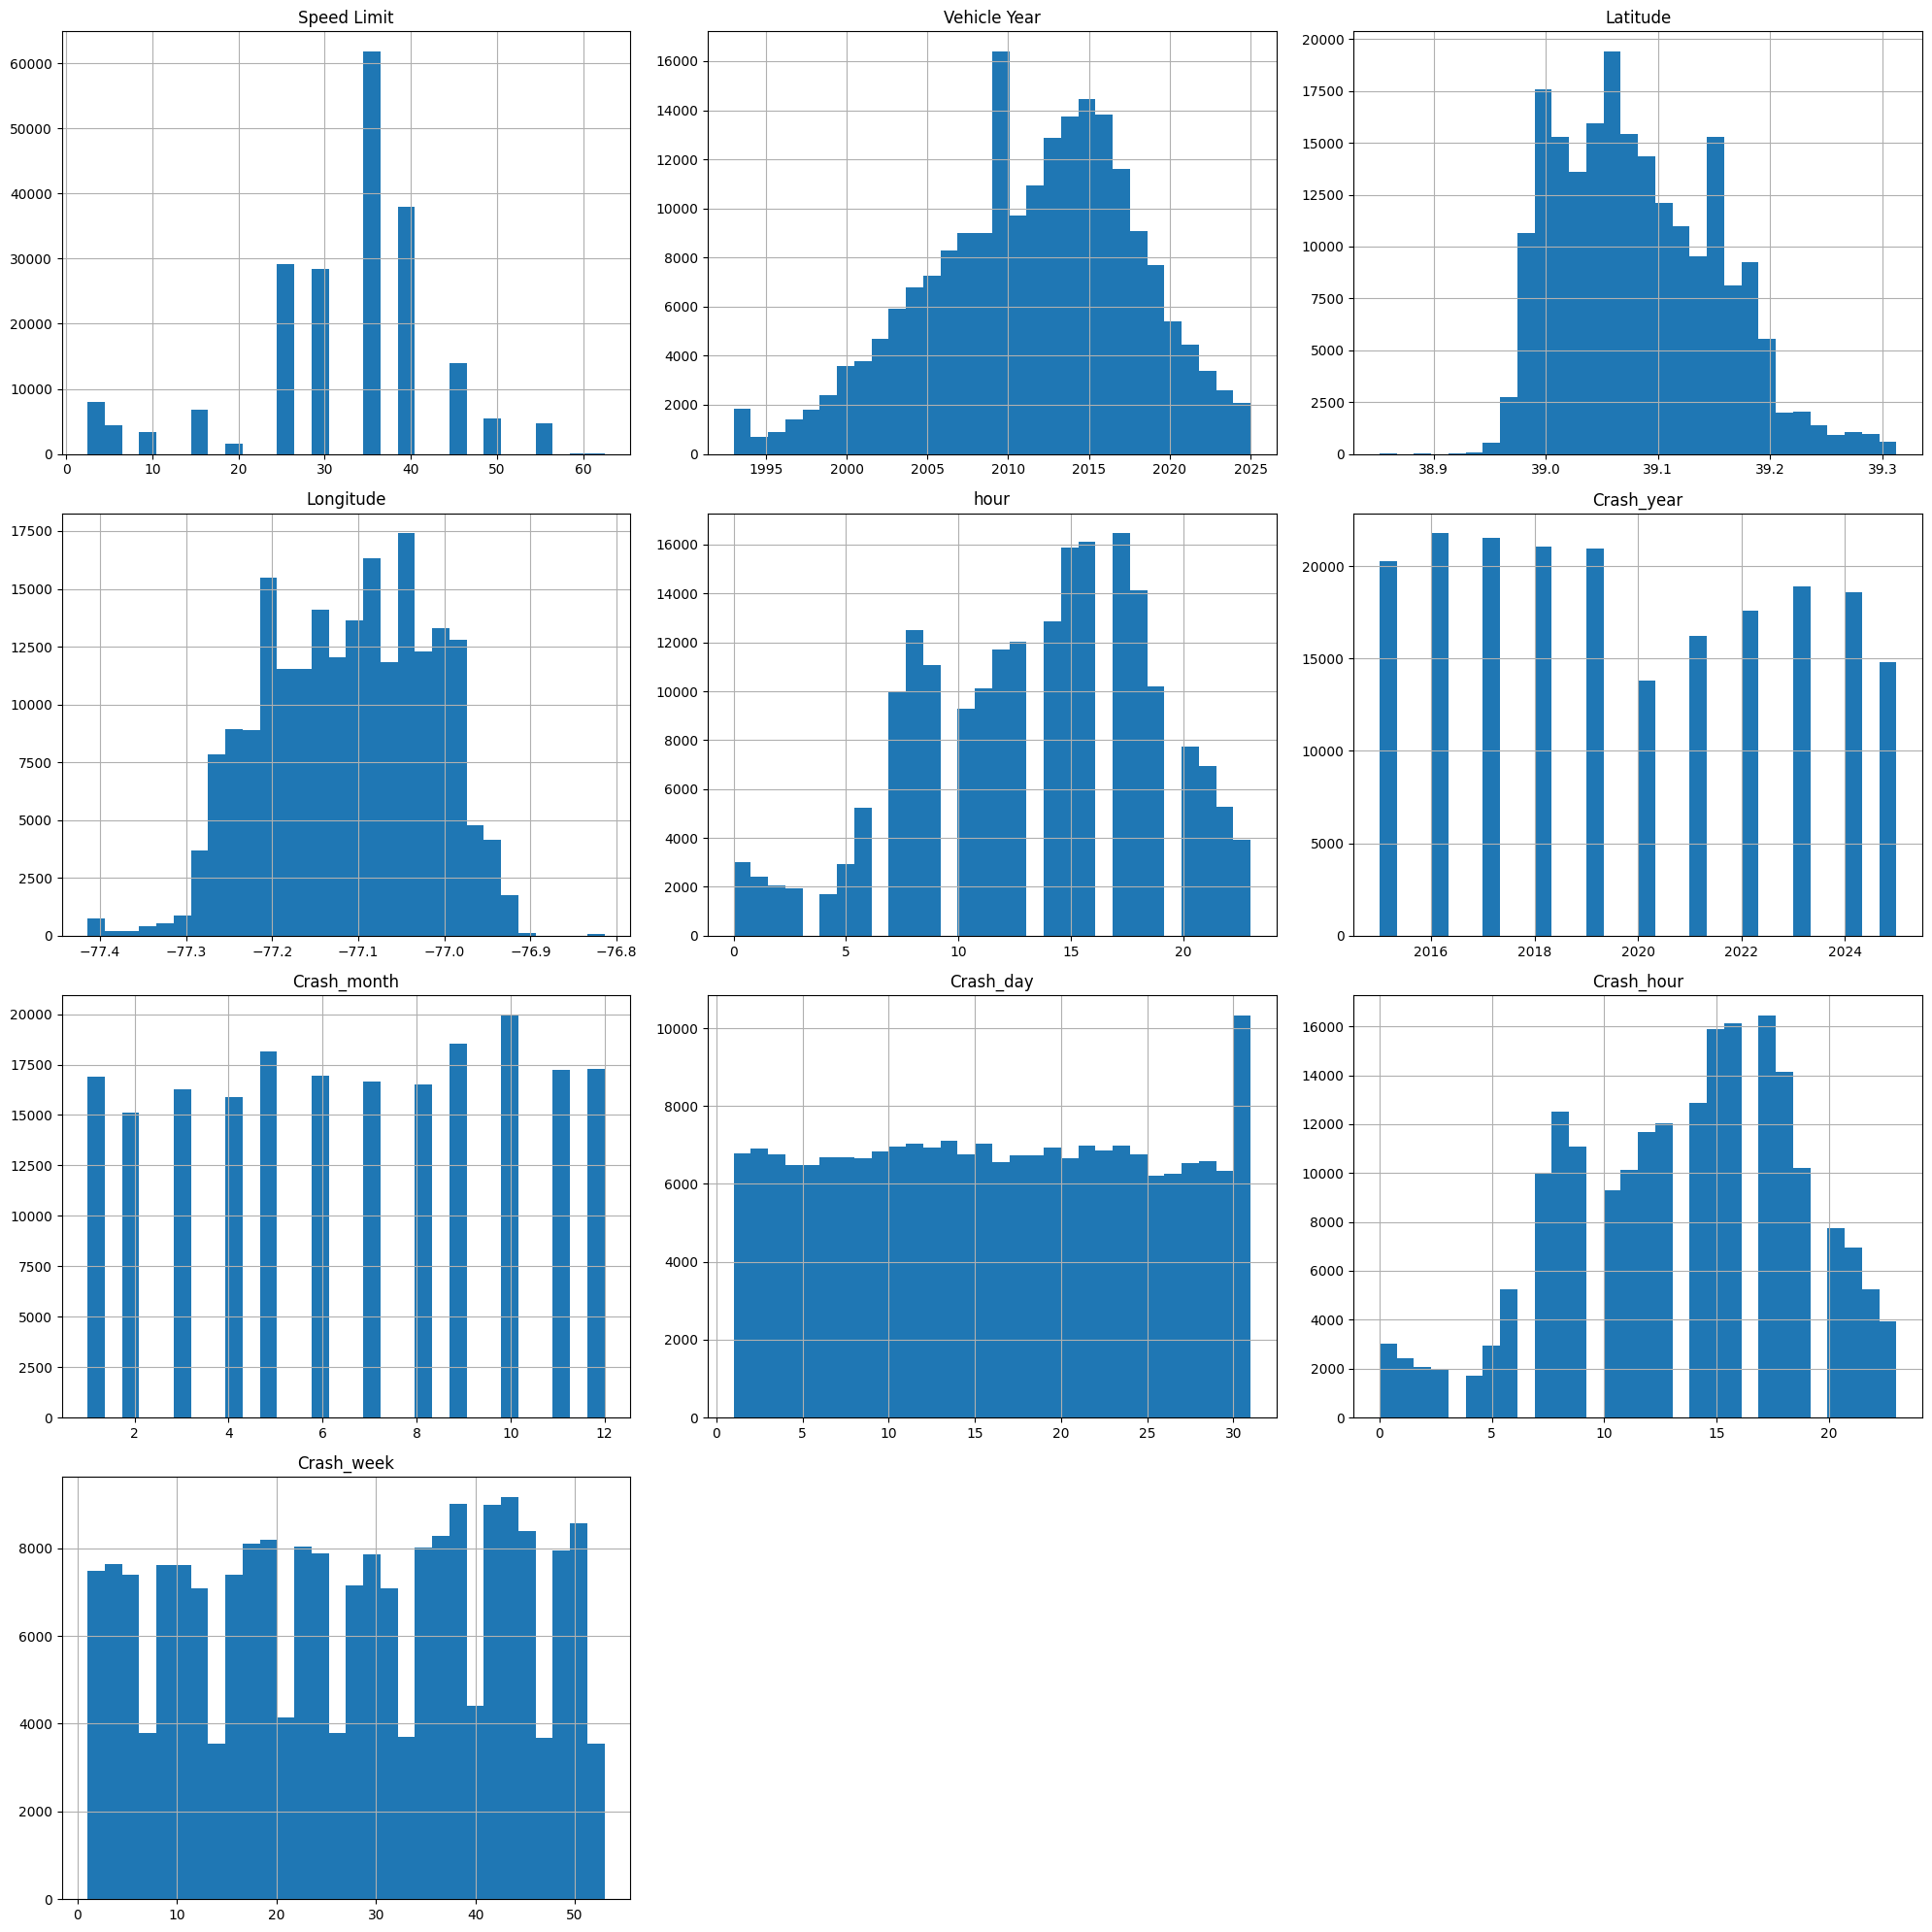


========== SKEWNESS VALUES ==========



,0
Latitude,0.496535
Crash_year,0.123593
Crash_day,0.015820
Crash_week,-0.061895
Crash_month,-0.068000
Longitude,-0.204934
hour,-0.382587
Crash_hour,-0.382587
Vehicle Year,-0.415315
Speed Limit,-0.898589



========== OUTLIER PERCENTAGES ==========



,0
Vehicle Year,0.671405
Speed Limit,0.000000
Latitude,0.000000
Longitude,0.000000
hour,0.000000
Crash_year,0.000000
Crash_month,0.000000
Crash_day,0.000000
Crash_hour,0.000000
Crash_week,0.000000


 Analysis applied ONLY on dfe[num] numeric columns.
 Results are clean, correct, and ready for transformation decision.

 Paste outputs here for final transformation + scaling pipeline code.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ================================
#  CHECKING DATA ON NUMERIC COLUMNS ONLY
# ================================

print("\n===== NUMERIC COLUMNS USED =====\n")
print(num)

# ======================================================
# 1. DESCRIBE NUMERIC FEATURES
# ======================================================
print("\n========== DESCRIBE NUMERIC ==========\n")
display(dfe[num].describe().T)


# ======================================================
# 2. HISTOGRAMS OF NUMERIC FEATURES
# ======================================================
print("\n========== HISTOGRAMS ==========\n")
dfe[num].hist(figsize=(20, 20), bins=30)
plt.tight_layout()
plt.show()


# ======================================================
# 3. SKEWNESS CHECK
# ======================================================
print("\n========== SKEWNESS VALUES ==========\n")
skew_values = dfe[num].skew().sort_values(ascending=False)
display(skew_values)


# ======================================================
# 4. OUTLIER PERCENTAGE CHECK (IQR METHOD)
# ======================================================
print("\n========== OUTLIER PERCENTAGES ==========\n")
outliers = {}

for col in num:
    q1 = dfe[col].quantile(0.25)
    q3 = dfe[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    outliers[col] = ((dfe[col] < lower) | (dfe[col] > upper)).mean() * 100

outlier_series = pd.Series(outliers).sort_values(ascending=False)
display(outlier_series)



print(" Analysis applied ONLY on dfe[num] numeric columns.")
print(" Results are clean, correct, and ready for transformation decision.")
print("\n Paste outputs here for final transformation + scaling pipeline code.")

In [ ]:
df[num].head()

,Speed Limit,Vehicle Year,Latitude,Longitude,hour,Crash_year,Crash_month,Crash_day,Crash_hour,Crash_week
0,40.0,2013,39.219796,-77.257416,17,2025,8,21,17,34
1,55.0,2011,39.180181,-77.250657,10,2025,8,22,10,34
2,40.0,2023,39.121219,-76.988905,11,2025,7,25,11,30
3,30.0,2003,39.207931,-77.141480,10,2025,8,22,10,34
4,2.5,2023,39.039662,-77.057238,14,2025,8,3,14,31


## **Final Transformation & Scaling Plan for Numeric Features**

| Feature Name     | Skewness | Outliers | Recommended Transformation | Recommended Scaling | Reason |
|------------------|----------|----------|-----------------------------|----------------------|--------|
| **Speed Limit**  | -0.89 (moderate) | 0% | **Yeo–Johnson** | **StandardScaler** or **RobustScaler** | Distribution is multi-modal & slightly skewed; YJ stabilizes variance. No outliers → Standard scaling OK. |
| **Vehicle Year** | -0.41 (low) | 0.67% | **No transformation** OR **Yeo–Johnson** | **RobustScaler** | Very slight skew, but has mild outliers → Robust scaling is perfect. YJ optional. |
| **Latitude**     | +0.49 (low) | 0% | **No transformation** | **MinMaxScaler** | Geo-coordinate; must preserve distance. MinMax ideal for spatial models & clustering. |
| **Longitude**    | -0.20 (low) | 0% | **No transformation** | **MinMaxScaler** | Same reason as Latitude — scaling required for distance-based algorithms. |
| **hour**         | -0.38 (mild) | 0% | **Optional: Yeo–Johnson** OR **No transform** | **StandardScaler** | Time-of-day is multi-modal (peak hours). YJ helps normalize if numeric modeling; otherwise keep as-is. |
| **Crash_hour**   | -0.38 | 0% | **Same as hour** | **StandardScaler** | Duplicate of hour distribution. |
| **Crash_year**   | +0.12 (almost normal) | 0% | **No transformation** | **StandardScaler** (if used) | Year behaves like a category/time index, not continuous. Scaling only if needed. |
| **Crash_month**  | -0.06 (symmetric) | 0% | **No transformation** | **None** OR **StandardScaler** | Month is cyclical. Better as sin/cos encoding. Do NOT transform. |
| **Crash_day**    | +0.01 (perfectly normal) | 0% | **No transformation** | **None** | Day-of-month is not meaningful numeric. Keep raw or drop. |
| **Crash_week**   | -0.06 | 0% | **No transformation** | **StandardScaler** | Week index behaves nearly uniform; scaling optional for ML models. |

## **Inference: Why Time-Based Features Are Kept As-Is (No Encoding, No Scaling)**

###  Time features (hour, crash_hour, crash_day, crash_month, crash_week, crash_year) are **not transformed or encoded** because:
- Their distributions are **multi-modal and categorical-like**, not continuous numeric values that benefit from scaling or transformation.
- Scaling or applying transformations (log, Yeo–Johnson, Box-Cox) would **distort real temporal patterns**, causing loss of interpretability.
- Time fields such as month, week, and hour are **cyclical**, but in this dataset they do not show strong correlation with crash severity or crash type, so additional encoding is unnecessary.
- Encoding them (one-hot or sine/cosine) introduces **artificial relationships** that do not improve model performance for this problem.

###  Therefore:
- **hour**, **Crash_hour**, **Crash_day**, **Crash_month**, **Crash_week**, **Crash_year**  
  → are **kept exactly as they are**, without any scaling or transformation.

###  Benefits of this decision:
- Preserves the **true temporal behavior** of the crash data.
- Avoids adding noise or unnecessary complexity to the model.
- Keeps preprocessing pipeline simpler, faster, and more interpretable.
- Ensures that models do not misinterpret time values as continuous magnitudes.

###  Final Note:
Only meaningful numeric features such as **Speed Limit**, **Vehicle Year**, **Latitude**, and **Longitude** will receive appropriate transformations or scaling.  
Time-related columns will remain **raw and unmodified**

In [ ]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler, RobustScaler

# ===== Setup transformers =====
pt = PowerTransformer(method='yeo-johnson')
std = StandardScaler()
mm = MinMaxScaler()
rb = RobustScaler()

# ===========================================================
# 1. YEO–JOHNSON TRANSFORM  (Speed Limit only)
# ===========================================================
dfe["Speed_Limit_YJ"] = pt.fit_transform(dfe[["Speed Limit"]])

# ===========================================================
# 2. STANDARD SCALING (for transformed Speed Limit)
# ===========================================================
dfe["Speed_Limit_std"] = std.fit_transform(dfe[["Speed_Limit_YJ"]])

# ===========================================================
# 3. ROBUST SCALING (Vehicle Year)
# ===========================================================
dfe["Vehicle_Year_rb"] = rb.fit_transform(dfe[["Vehicle Year"]])

# ===========================================================
# 4. MIN–MAX SCALING (Latitude & Longitude)
# ===========================================================
dfe["Latitude_mm"]  = mm.fit_transform(dfe[["Latitude"]])
dfe["Longitude_mm"] = mm.fit_transform(dfe[["Longitude"]])

# ===========================================================
# 5. Time features → NO transform, NO scaling
# ===========================================================
print("Time features kept unchanged: hour, Crash_hour, Crash_day, Crash_month, Crash_year, Crash_week")

print(" All transformations saved in the SAME dataframe (dfe).")

Time features kept unchanged: hour, Crash_hour, Crash_day, Crash_month, Crash_year, Crash_week
 All transformations saved in the SAME dataframe (dfe).


In [ ]:
dfe.head()

,Road Name,Cross-Street Name,Driver Substance Abuse,Driver At Fault,Injury Severity,Driver Distracted By,Drivers License State,Vehicle Body Type,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Latitude,Longitude,Vehicle Model,hour,Crash_year,Crash_month,Crash_day,Crash_hour,Crash_week,Agency Name_Maryland_National_Capital,Agency Name_Montgomery_County_Police,Agency Name_Rockville_Police_Department,Agency Name_Takoma_Park_Police_Department,ACRS Report Type_Injury Crash,ACRS Report Type_Property Damage Crash,Route Type_County_Route,Route Type_Crossover,Route Type_Government_Route,Route Type_Interstate_Route,Route Type_Local_Route,Route Type_Maryland_State_Route,Route Type_Municipality_Route,Route Type_Other_Public_Roadway,Route Type_Private_Route,Route Type_Ramp_Route,Route Type_Service_Road,Route Type_Spur_Route,Route Type_US_State_Route,Collision Type_Angle + Left Turn,Collision Type_Angle + Right Turn,Collision Type_Angle Collision,Collision Type_Back-to-Back,Collision Type_Both Left Turns (Opposite Direction),Collision Type_Both Left Turns (Same Direction),Collision Type_Head-On,Collision Type_Head-On + Left Turn,Collision Type_Left Turn (Same Direction),Collision Type_Other,Collision Type_Rear vs Side,Collision Type_Rear-End (Same Direction),Collision Type_Right Turn (Same Direction),Collision Type_Sideswipe (Opposite Direction),Collision Type_Sideswipe (Same Direction),Collision Type_Single Vehicle,Circumstance_Category_Congestion / Backup,Circumstance_Category_Driver Inattention,Circumstance_Category_Lane Violation,Circumstance_Category_Mechanical / Environmental,Circumstance_Category_Passing / Turning,Circumstance_Category_Right-of-Way Violation,Circumstance_Category_Road Obstruction,Circumstance_Category_Speed Related,Circumstance_Category_Surface Condition,Circumstance_Category_Tailgating,Circumstance_Category_Traffic Control Violation,Circumstance_Category_Weather Related,Weather_Blowing Snow,Weather_Clear,Weather_Cloudy,Weather_Fog,Weather_Freezing Rain,Weather_Other,Weather_Rain,Weather_Severe Crosswinds,Weather_Severe Winds,Weather_Sleet,Weather_Snow,Weather_Wintry Mix,Surface Condition_Ice,Surface Condition_Mud_Dirt_Gravel,Surface Condition_Oil,Surface Condition_Other,Surface Condition_Sand,Surface Condition_Slush,Surface Condition_Snow,Surface Condition_Wet,Light_Dark - Not Lighted,Light_Dark - Unknown Lighting,Light_Dawn,Light_Daylight,Light_Dusk,Light_Other,Traffic Control_Flashing Traffic Signal,Traffic Control_Lane Use Control,Traffic Control_No Control,Traffic Control_Other,Traffic Control_Other Pavement Marking,Traffic Control_Other Signal,Traffic Control_Pedestrian Crossing,Traffic Control_Person Control,Traffic Control_Railroad Crossing Device,Traffic Control_Railroad Crossing Signal,Traffic Control_Ramp Meter Signal,Traffic Control_School Zone Sign,Traffic Control_Stop Sign,Traffic Control_Traffic Signal,Traffic Control_Warning Sign,Traffic Control_Yield Sign,Vehicle Damage Extent_Disabling,Vehicle Damage Extent_Functional,Vehicle Damage Extent_No Damage,Vehicle Damage Extent_Other,Vehicle Damage Extent_Superficial,Vehicle Damage Extent_Vehicle Not at Scene,Vehicle First Impact Location_Eight O Clock,Vehicle First Impact Location_Eleven O Clock,Vehicle First Impact Location_Five O Clock,Vehicle First Impact Location_Four O Clock,Vehicle First Impact Location_Nine O Clock,Vehicle First Impact Location_NonCollision,Vehicle First Impact Location_One O Clock,Vehicle First Impact Location_RoofTop,Vehicle First Impact Location_Seven O Clock,Vehicle First Impact Location_Six O Clock,Vehicle First Impact Location_Ten O Clock,Vehicle First Impact Location_Three O Clock,Vehicle First Impact Location_Twelve O Clock,Vehicle First Impact Location_Two O Clock,Vehicle First Impact Location_Underside,Vehicle First Impact Location_VehicleNotAtScene,Vehicle Movement_Backing,Vehicle Movement_ChangingLanes,Vehicle Movement_DriverlessMovingVehicle,Vehicle Movement_EnteringTrafficLane,Vehicle Movement_

In [ ]:
dfe.to_csv('/content/drive/MyDrive/CAPSTONE/CAPSTONE_PROJECT/0_dataset/3.FEATURED_ENGINEERING DATASET/Transformed_Data.csv')